In [1355]:
import pandas as pd
import math
from scipy import stats
import matplotlib.pyplot as plt

### Loading the dataset

In [1356]:
data = pd.read_csv('Hurricane.csv')

In [1357]:
print(data.head())

                           Name  Season               Month  \
0                  Hurricane #3    1853   August, September   
1  "1856 Last Island Hurricane"    1856              August   
2                  Hurricane #6    1866  September, October   
3                  Hurricane #7    1878  September, October   
4                  Hurricane #2    1880              August   

   Max. sustained winds(mph)  Minimum pressure(mbar)  
0                        150                     924  
1                        150                     934  
2                        140                     938  
3                        140                     938  
4                        150                     931  


In [1358]:
data.columns = ['Name', 'Season', 'Month', 'mph', 'mbar']

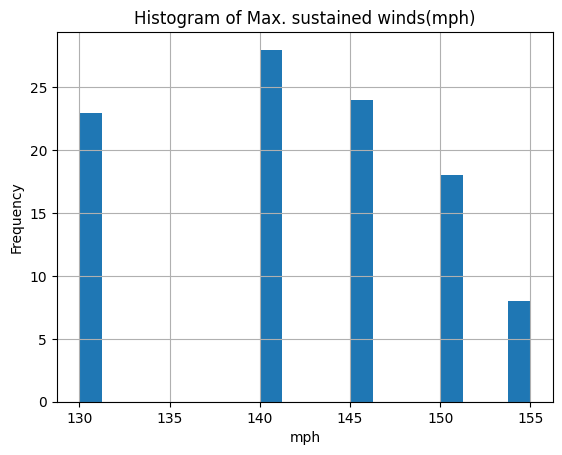

In [1359]:
data['mph'].hist(bins=20)
plt.xlabel('mph')
plt.ylabel('Frequency')
plt.title('Histogram of Max. sustained winds(mph)')
plt.show()

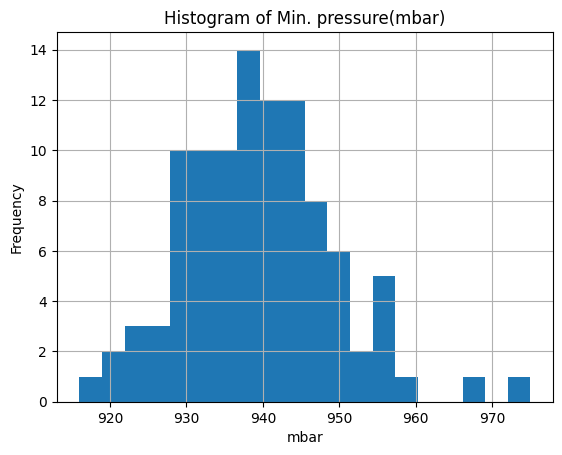

In [1360]:
data['mbar'].hist(bins=20)
plt.xlabel('mbar')
plt.ylabel('Frequency')
plt.title('Histogram of Min. pressure(mbar)')
plt.show()

### Preprocessing

In [1361]:
# cleaning Month column
data['Month'] = data['Month'].str.strip()
data['Month'] = data['Month'].str.replace(',', ' ')
data['Month'] = data['Month'].str.replace('-', ' ') 
data['Month'] = data['Month'].str.replace('Aug', 'August') 
data['Month'] = data['Month'].str.replace(r'\d+', '', regex=True)  
data['Month'] = data['Month'].str.replace('Augustust', 'August') 

data['Month']

0       August  September
1                  August
2      September  October
3      September  October
4                  August
              ...        
96              October  
97     August  September 
98                August 
99     August  September 
100           September  
Name: Month, Length: 101, dtype: object

In [1362]:
# splitting one row into multiple rows if it contains multiple months
data['Month'] = data['Month'].str.split()
data = data.explode('Month')

data

,Name,Season,Month,mph,mbar
0,Hurricane #3,1853,August,150,924
0,Hurricane #3,1853,September,150,924
1,"""1856 Last Island Hurricane""",1856,August,150,934
2,Hurricane #6,1866,September,140,938
2,Hurricane #6,1866,October,140,938
...,...,...,...,...,...
97,Hurricane Fabian,2003,September,145,939
98,Hurricane Charley,2004,August,150,941
99,Hurricane Frances,2004,August,145,935
99,Hurricane Frances,2004,September,145,935


### (a) With a 1% level of significance conduct t-test for correlation coefficient between “Max. sustained winds(mph)” and “Minimum pressure(mbar)”.

#### Preprocessing the data

In [1363]:
# min max scaling numerical data
# mph_org = data['mph']
# mbar_org = data['mbar']
# data['mph'] = (data['mph'] - data['mph'].min()) / (data['mph'].max() - data['mph'].min())
# data['mbar'] = (data['mbar'] - data['mbar'].min()) / (data['mbar'].max() - data['mbar'].min())

#### t-test
Null Hypothesis: There is no correlation between “Max. sustained winds(mph)” and “Minimum pressure(mbar)”\
Alternate Hypothesis: There is a correlation between “Max. sustained winds(mph)” and “Minimum pressure(mbar)”


Method:\

Covariance:\

$$Cov(X, Y) = \frac{\sum_{i=1}^{n} (X_i - \bar{X})(Y_i - \bar{Y})}{n}$$

Standard Deviation:\

$$\sigma_X = \sqrt{\frac{\sum_{i=1}^{n} (X_i - \bar{X})^2}{n}}$$

Correlation Coefficient:\

$$r = \frac{Cov(X, Y)}{\sigma_X \sigma_Y}$$

t-test:\

$$t = \frac{r \sqrt{n-2}}{\sqrt{1-r^2}}$$

where n is the number of samples

In [1364]:
# Calculating mean
mean_mph = data['mph'].mean()
mean_mbar = data['mbar'].mean()

print(f"Mean of Max Sustained Winds: {mean_mph}")
print(f"Mean of Minimum Pressure: {mean_mbar}")

# Calculating covariance
covariance = sum((data['mph'] - mean_mph) * (data['mbar'] - mean_mbar)) / (len(data) - 1)

print(f"Covariance: {covariance}")

# Calculating standard deviation
std_dev_mph = math.sqrt(sum((data['mph'] - mean_mph) ** 2) / (len(data) - 1))
std_dev_mbar = math.sqrt(sum((data['mbar'] - mean_mbar) ** 2) / (len(data) - 1))

print(f"Standard Deviation of Max Sustained Winds: {std_dev_mph}")
print(f"Standard Deviation of Minimum Pressure: {std_dev_mbar}")

# Calculating correlation
correlation = covariance / (std_dev_mph * std_dev_mbar)

print(f"Correlation: {correlation}")

# t-test
n = len(data)
t = correlation * math.sqrt(n - 2) / math.sqrt(1 - correlation ** 2)

print(f"t-test: {t}")

# range: mean - t * std_dev, mean + t * std_dev
t_value = stats.t.ppf(0.995, n-2)

print(f"t-value: {t_value}")

print("------------------------------------------------------------------------------------------------------------")

if abs(t) > t_value:
    print("Reject the null hypothesis; there is a significant correlation between Max Sustained Winds and Minimum Pressure")
else:
    print("Accept the null hypothesis; there is no significant correlation between Max Sustained Winds and Minimum Pressure")

print("------------------------------------------------------------------------------------------------------------")

# p-value
p = 2 * (1 - stats.t.cdf(abs(t), df=n-2))

print("Degree of Freedom:", n-2)

print(f"p-value: {p}")

print("------------------------------------------------------------------------------------------------------------")

# Conclusion
if p < 0.01:
    print("Reject the null hypothesis; there is a significant correlation between Max Sustained Winds and Minimum Pressure")
else:
    print("Accept the null hypothesis; there is no significant correlation between Max Sustained Winds and Minimum Pressure")

Mean of Max Sustained Winds: 142.33576642335765
Mean of Minimum Pressure: 938.8029197080292
Covariance: -35.89657578359814
Standard Deviation of Max Sustained Winds: 7.766138199470568
Standard Deviation of Minimum Pressure: 9.985165037413662
Correlation: -0.46290584088602793
t-test: -6.067728544364732
t-value: 2.612737907693308
------------------------------------------------------------------------------------------------------------
Reject the null hypothesis; there is a significant correlation between Max Sustained Winds and Minimum Pressure
------------------------------------------------------------------------------------------------------------
Degree of Freedom: 135
p-value: 1.2303904561861145e-08
------------------------------------------------------------------------------------------------------------
Reject the null hypothesis; there is a significant correlation between Max Sustained Winds and Minimum Pressure


### (b) With a 5% level of significance test if the “Max. sustained winds(mph)” of hurricane depends on the month of its occurrence.

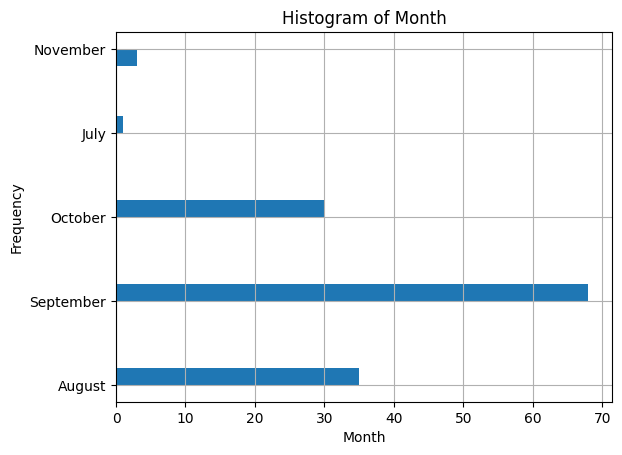

In [1365]:
data['Month'].hist(bins=20, orientation='horizontal')
plt.xlabel('Month')
plt.ylabel('Frequency')
plt.title('Histogram of Month')
plt.show()

mph,130,140,145,150,155
Month,,,,,
0,0,1,0,0,0
1,7,9,7,8,4
2,16,18,17,11,6
3,5,10,8,5,2
4,0,1,1,0,1


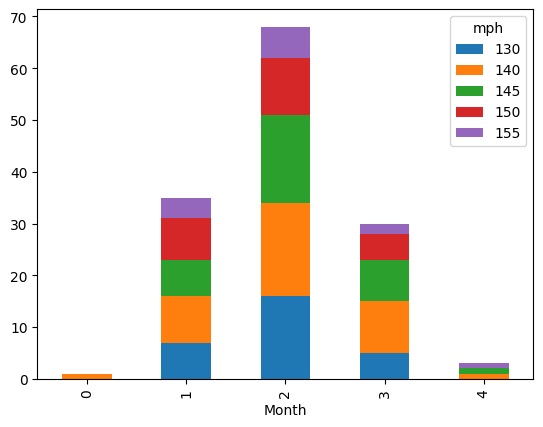

In [1385]:
contingency_table = pd.crosstab(data['Month'], data['mph'])
contingency_table.plot(kind='bar', stacked=True)
contingency_table

#### Chi Square test
Null Hypothesis: The “Max. sustained winds(mph)” of hurricane does not depend on the month of its occurrence\
Alternate Hypothesis: The “Max. sustained winds(mph)” of hurricane depends on the month of its occurrence

Method:\

Chi Square test:\

$$\chi^2 = \sum_{i=1}^{n} \frac{(O_i - E_i)^2}{E_i}$$

where n is the number of categories

In [1367]:
month_total = contingency_table.sum(axis=1)
mph_total = contingency_table.sum(axis=0)
contingency_total = contingency_table.values.sum()

print("month_total:", month_total)
print("mph_total:", mph_total)
print("contingency_total:", contingency_total)

month_total: Month
August       35
July          1
November      3
October      30
September    68
dtype: int64
mph_total: mph
130    28
140    39
145    33
150    24
155    13
dtype: int64
contingency_total: 137


In [1368]:
expected_frequency = pd.DataFrame(index=contingency_table.index, columns=contingency_table.columns)

for i in contingency_table.index:
    for j in contingency_table.columns:
        expected_frequency.at[i, j] = (month_total[i] * mph_total[j]) / contingency_total

print("Expected Frequency:")
print(expected_frequency)

Expected Frequency:
mph             130        140        145        150       155
Month                                                         
August     7.153285   9.963504   8.430657   6.131387  3.321168
July        0.20438   0.284672   0.240876   0.175182  0.094891
November   0.613139   0.854015   0.722628   0.525547  0.284672
October    6.131387   8.540146   7.226277   5.255474  2.846715
September  13.89781  19.357664  16.379562  11.912409  6.452555


In [1369]:
# Chi-square test
chi_square = 0

for i in contingency_table.index:
    for j in contingency_table.columns:
        observed = contingency_table.at[i, j]
        expected = expected_frequency.at[i, j]
        chi_square += (observed - expected) ** 2 / expected

print(f"Chi-square: {chi_square}")

Chi-square: 7.971634778620072


In [1370]:
rows, cols = contingency_table.shape
df = (rows - 1) * (cols - 1)

print(f"Degrees of Freedom: {df}")

Degrees of Freedom: 16


In [1371]:
chi_square_critical = stats.chi2.ppf(1 - 0.025, df)
chi_square_critical_lower = stats.chi2.ppf(0.025, df)

print(f"Chi-square Critical: {chi_square_critical}")
print(f"Chi-square Critical Lower: {chi_square_critical_lower}")

if chi_square > chi_square_critical or chi_square < chi_square_critical_lower:
    print("Reject the null hypothesis; there is a significant relationship between Month and Max Sustained Winds")
else:
    print("Accept the null hypothesis; there is no significant relationship between Month and Max Sustained Winds")

Chi-square Critical: 28.845350723404753
Chi-square Critical Lower: 6.907664353497004
Accept the null hypothesis; there is no significant relationship between Month and Max Sustained Winds


In [1372]:
# p-value
p = 1 - stats.chi2.cdf(chi_square, df=df)

print(f"p-value: {p}")

# Conclusion
if p < 0.05:
    print("Reject the null hypothesis; there is a significant association between Month and Max Sustained Winds")
else:
    print("Accept the null hypothesis; there is no significant association between Month and Max Sustained Winds")

p-value: 0.9497063344388978
Accept the null hypothesis; there is no significant association between Month and Max Sustained Winds


#### Further processing of 'Month' column

In [1373]:
# converting months into relative ordinal values
data['Month'] = pd.Categorical(data['Month'], ordered=True, categories=['July', 'August', 'September', 'October', 'November'])
data['Month'] = data['Month'].cat.codes

print(data['Month'])

0      1
0      2
1      1
2      2
2      3
      ..
97     2
98     1
99     1
99     2
100    2
Name: Month, Length: 137, dtype: int8


#### t-test
Null Hypothesis: There is no correlation between “Max. sustained winds(mph)” and “Month”\
Alternate Hypothesis: There is a correlation between “Max. sustained winds(mph)” and “Month”

In [1374]:
# t-test
# calculating mean
mean_month = data['Month'].mean()

print(f"Mean of Month: {mean_month}")

# calculating covariance
covariance = sum((data['Month'] - mean_month) * (data['mph'] - mean_mph)) / (len(data) - 1)

print(f"Covariance: {covariance}")

# calculating standard deviation
std_dev_month = math.sqrt(sum((data['Month'] - mean_month) ** 2) / (len(data) - 1))

print(f"Standard Deviation of Month: {std_dev_month}")

# calculating correlation
correlation = covariance / (std_dev_month * std_dev_mph)

print(f"Correlation: {correlation}")

# t-test
n = len(data)
t = correlation * math.sqrt(n - 2) / math.sqrt(1 - correlation ** 2)

print(f"t-test: {t}")

# range: mean - t * std_dev, mean + t * std_dev
t_value = stats.t.ppf(0.975, n-2)

print(f"t-value: {t_value}")

if abs(t) > t_value:
    print("Reject the null hypothesis; there is a significant correlation between Month and Max Sustained Winds")
else:
    print("Accept the null hypothesis; there is no significant correlation between Month and Max Sustained Winds")

# p-value
p = 2 * (1 - stats.t.cdf(abs(t), df=n-2))

print("Degree of Freedom:", n-2)

print(f"p-value: {p}")

# Conclusion
if p < 0.05:
    print("Reject the null hypothesis; there is a significant correlation between Month and Max Sustained Winds")
else:
    print("Accept the null hypothesis; there is no significant correlation between Month and Max Sustained Winds")

Mean of Month: 1.9927007299270072
Covariance: 0.05393945899527636
Standard Deviation of Month: 0.7717088597331507
Correlation: 0.009000113479535317
t-test: 0.1045761043854583
t-value: 1.977692277222804
Accept the null hypothesis; there is no significant correlation between Month and Max Sustained Winds
Degree of Freedom: 135
p-value: 0.9168673863071735
Accept the null hypothesis; there is no significant correlation between Month and Max Sustained Winds


### With a 10% level of significance conduct test if “Max. sustained winds(mph)” follows a Poisson distribution.
Poission distribution is given by:

$$P(X=k) = \frac{e^{-\lambda} \lambda^k}{k!}$$

where k is the number of occurrences, and $\lambda$ is the average number of occurrences

#### Expected and Observed frequencies

In [1375]:
# scaling_factor = 2

# # scaling mph
# data['mph'] = data['mph'] // scaling_factor

In [1376]:
# scaling_factor = 2

# data['mph'] = data['mph'] * scaling_factor
# data['mph'] = data['mph'].astype(int)
# data['mph']

In [1377]:
#min max scaling month
# data['Month'] = (data['Month'] - data['Month'].min()) / (data['Month'].max() - data['Month'].min())

In [1378]:
mph_count = data['mph'].value_counts()

print(mph_count)


mph
140    39
145    33
130    28
150    24
155    13
Name: count, dtype: int64


In [1379]:
# # how many times each wind occurred
# mph_count = mph_org.value_counts()

# print("mph_count:")
# print(mph_count)

In [1380]:
mean_mph_scaled = data['mph'].mean()

In [1381]:
# expected frequencies using Poisson distribution
expected_frequency = {}
n = len(data)

# print("Total Observations:", n)

for i in mph_count.index:
    poisson_prob = stats.poisson.pmf(i, mean_mph_scaled)
    # poisson_prob = (mean_mph_scaled ** i) * math.exp(-mean_mph_scaled) / math.factorial(i)
    expected_frequency[i] = poisson_prob * n + 1e-15

print("Expected Frequency:")
print(expected_frequency)

Expected Frequency:
{140: 4.52833796439542, 145: 4.425222015865378, 130: 2.7619462507085055, 150: 3.6416302840133272, 155: 2.5380588506680306}


#### Chi Square test
Null Hypothesis: “Max. sustained winds(mph)” follows a Poisson distribution\
Alternate Hypothesis: “Max. sustained winds(mph)” does not follow a Poisson distribution

In [1382]:
chi_square = 0

for i in mph_count.index:
    observed = mph_count[i]
    expected = expected_frequency[i]
    chi_square += (observed - expected) ** 2 / expected

print(f"Chi-square: {chi_square}")

Chi-square: 834.484409173985


In [1383]:
df = len(mph_count) - 2

print(f"Degrees of Freedom: {df}")

Degrees of Freedom: 3


In [1384]:
chi_square_critical = stats.chi2.ppf(0.90, df)

print(f"Chi-square Critical: {chi_square_critical}")

if abs(chi_square) > chi_square_critical:
    print("Reject the null hypothesis; the distribution of Max Sustained Winds is not Poisson")
else:
    print("Accept the null hypothesis; the distribution of Max Sustained Winds is Poisson")

Chi-square Critical: 6.251388631170325
Reject the null hypothesis; the distribution of Max Sustained Winds is not Poisson


### References
- https://www.medcalc.org/manual/statistical-tables.php
- https://www.statology.org/t-test-for-correlation/
- https://stats.libretexts.org/Bookshelves/Introductory_Statistics/Introductory_Statistics_1e_(OpenStax)/12%3A_Linear_Regression_and_Correlation/12.05%3A_Testing_the_Significance_of_the_Correlation_Coefficient
